## 시대별 가사 분석 - 1980년대

### (1) 1980~1989년 연도별 top50 가사 저장

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import platform
import matplotlib.pyplot as plt
from wordcloud import WordCloud

headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

def getID(url): # 노래 id 뽑아오기
    soup=BeautifulSoup(url.text,'html.parser')
    song_id=soup.select('tbody>tr')
    song_id_list=[]
    for id in song_id:
        song_id_list.append(int(id['songid']))
    return song_id_list

In [2]:
def music_info(): # 아티스트, 제목, 장르, 가사 뽑아서 새로운 DF 저장
    year_list=[]
    lyric_list=[]
    genre_list=[]
    title_list=[]
    artist_list=[] 
    for year in range(1980,1990):
        url=requests.get('https://www.genie.co.kr/chart/musicHistory?year={}&category=0'.format(year),headers=headers)

        with open('{}가사.txt'.format(year),mode='w',encoding='utf-8') as f:
            for id in getID(url):
                # 내부링크 ex) 1980년대 1~50위
                html=requests.get('https://www.genie.co.kr/detail/songInfo?xgnm={}'.format(id),headers=headers)
                soup=BeautifulSoup(html.text,'html.parser')
                
                # 연도 / DF 구분하기 쉬우라고 임의로 넣어줌
                year_list.append(year)

                # 가사
                lyrics=soup.select_one('pre>p')
                lyric_list.append(lyrics.text.replace('\t','').replace('\r','').replace('\n',''))
                f.write(lyrics.text.replace('\t','').replace('\r','').replace('\n',''))

                # 제목  
                title=soup.select_one('pre>div')
                title=title.text.split(' - ')[0]
                title_list.append(title)

                # 장르
                infos=soup.find('ul',class_="info-data")
                infos=infos.text.split('\n ')
                artist_list.append(infos[1])
                genre_list.append(infos[3])        
    music={
        '연도':year_list,
        '아티스트':artist_list,
        '제목':title_list,
        '장르':genre_list,
        '가사':lyric_list
    }    
    musicDF=pd.DataFrame(music)
    musicDF.to_csv('노래 정보.csv',encoding='utf-8')
    
music_info()

### (2) 연도별 가사 형태소 분석

In [3]:
# 저장한 음악 정보 불러오기
musicDF=pd.read_csv('노래 정보.csv',encoding='utf-8')
musicDF=musicDF.iloc[:,1:]
musicDF.head()

,연도,아티스트,제목,장르,가사
0,1980,조용필,창밖의 여자,가요 / 발라드,창가에 서면 눈물처럼 떠오르는 그대의 흰손 돌아서 눈감으면 강물이어라 한줄기 바람되...
1,1980,조용필,단발머리,가요 / 전체,그 언젠가 나를 위해 꽃다발을 전해주던 그 소녀 오늘따라 왜 이렇게 그 소녀가 보고...
2,1980,조용필,사랑은 아직도 끝나지 않았네,가요 / 트로트,다시는 생각을 말자 생각을 말자고 그렇게 애타던 말 한마디 못하고 잊어야 잊어야만 ...
3,1980,함중아,풍문으로 들었소,가요 / 트로트,그대없는 나날들이 그얼마나 외로웠나멀리있는 그대생각 이밤따라 길어지네하얀얼굴 그리울...
4,1980,산울림,창문 너머 어렴풋이 옛 생각이 나겠지요,가요 / 락,그런 슬픈 눈으로 나를 보지 말아요가버린 날들이지만 잊혀지진 않을 거예요오늘처럼 비...


In [111]:
musicDF[musicDF['연도']==1980]

,연도,아티스트,제목,장르,가사
0,1980,조용필,창밖의 여자,가요 / 발라드,창가에 서면 눈물처럼 떠오르는 그대의 흰손 돌아서 눈감으면 강물이어라 한줄기 바람되...
1,1980,조용필,단발머리,가요 / 전체,그 언젠가 나를 위해 꽃다발을 전해주던 그 소녀 오늘따라 왜 이렇게 그 소녀가 보고...
2,1980,조용필,사랑은 아직도 끝나지 않았네,가요 / 트로트,다시는 생각을 말자 생각을 말자고 그렇게 애타던 말 한마디 못하고 잊어야 잊어야만 ...
3,1980,함중아,풍문으로 들었소,가요 / 트로트,그대없는 나날들이 그얼마나 외로웠나멀리있는 그대생각 이밤따라 길어지네하얀얼굴 그리울...
4,1980,산울림,창문 너머 어렴풋이 옛 생각이 나겠지요,가요 / 락,그런 슬픈 눈으로 나를 보지 말아요가버린 날들이지만 잊혀지진 않을 거예요오늘처럼 비...
5,1980,윤시내,고목,가요 / 트로트,갈길 멀다 쉬어가는 곳구름처럼 머물다가는 곳산굽이 돌아 밤이오면하늘가에 그리움 일던...
6,1980,Nami (나미),영원한 친구,가요 / 트로트,파란하늘 맴도는 비둘기 날개처럼 우리들의 마음은 하늘을 날아가요 서로 다같이 웃으면...
7,1980,Nami (나미),미운정 고운정,가요 / 트로트,떠나갑니다 나를 두고 갑니다 미운정 고운정을 남기고 떠납니다 돌아올 기약없는 연락선...
8,1980,계은숙,기다리는 여심,가요 / 트로트,내 마음 왜로울땐 눈을 감아요자꾸만 떠오르는 그대 생각에가슴에 느껴지는 사랑에숨결멀...
9,1980,심수봉,당신은 누구시길래,가요 / 트로트,당신은 누구시길래 내마음 가져갔나요당신때문에 울고 있어요 당신 때문에 울고 있어요당...


In [116]:
def draw_wordcloud(year):
    okt=Okt()
    sentences_tag=[]
    music_lyrics=list(musicDF[musicDF['연도']==year]['가사']) # 연도별 가사만

    # 형태소 구분하여 리스트에 넣기
    for sentence in music_lyrics:
        morph=okt.pos(sentence)
        sentences_tag.append(morph)

    noun_adj_list=[]
    # 명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30) # 30개로 보여 주기로 정함

    # wordCloud생성
    # 한글 깨지는 문제 해결하기위해 font_path 지정
    if platform.system() == 'Windows':
        path=r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':  # Mac OS
        path=r'/System/Library/Fonts/AppleGothic'
    else:
        path=r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc=WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.title('<{}년 WordCloud>'.format(year),size=30)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

{'사랑': 47, '마음': 45, '당신': 40, '말': 29, '내': 25, '그': 20, '너': 20, '생각': 19, '날': 19, '오': 19, '눈': 17, '길': 16, '세상': 16, '바': 16, '야야': 16, '그대': 15, '나': 15, '하늘': 14, '돈': 13, '인생': 12, '별': 12, '팽이': 12, '물레': 12, '제': 12, '바람': 11, '세월': 11, '사람': 11, '꿈': 11, '누구': 11, '광구': 11}


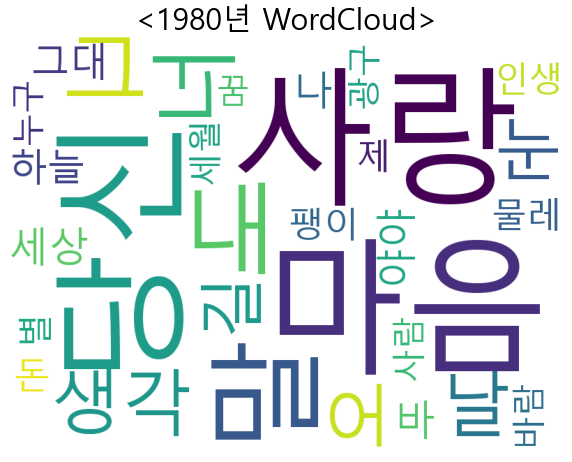

{'나': 155, '사랑': 61, '마음': 48, '그': 47, '내': 35, '당신': 33, '그대': 29, '너': 24, '사람': 23, '아름다운': 22, '하늘': 20, '밤': 19, '가지마오': 19, '노래': 18, '곳': 18, '우리': 14, '바람': 14, '다시': 13, '가슴': 12, '친구': 12, '못': 12, '이': 12, '별': 12, '외로워': 12, '걸': 12, '겨울': 11, '없는': 11, '눈': 10, '모습': 10, '웃음': 10}


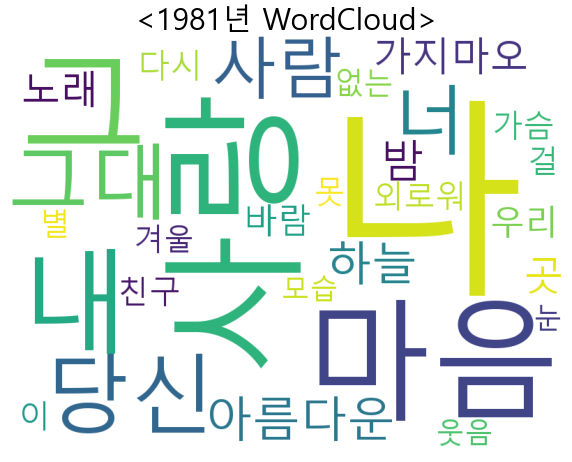

{'사랑': 77, '나': 45, '그': 37, '그대': 31, '여인': 28, '밤': 28, '마음': 27, '당신': 24, '노래': 24, '바람': 23, '것': 23, '내': 22, '꾀꼬리': 22, '가슴': 21, '눈': 20, '생각': 18, '너': 18, '이': 17, '눈물': 16, '속': 15, '말': 14, '사람': 14, '이제': 14, '다시': 13, '꿈': 13, '못': 13, '왜': 12, '바보': 12, '오늘': 11, '우리': 11}


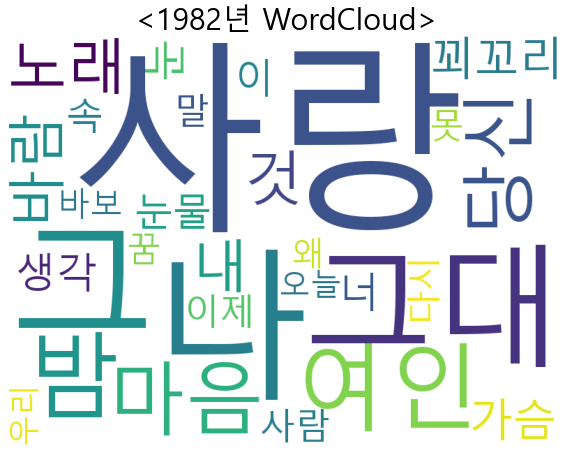

{'사랑': 93, '내': 61, '나': 59, '그대': 51, '그': 42, '사람': 41, '마음': 39, '말': 35, '모습': 29, '당신': 28, '인생': 27, '가슴': 24, '생각': 23, '것': 22, '속': 22, '꿈': 20, '수': 20, '눈': 19, '때': 19, '눈물': 18, '날': 18, '몸': 18, '모두': 18, '이': 16, '낙엽': 16, '꽃': 14, '바람': 14, '너': 14, '새': 14, '하리': 13}


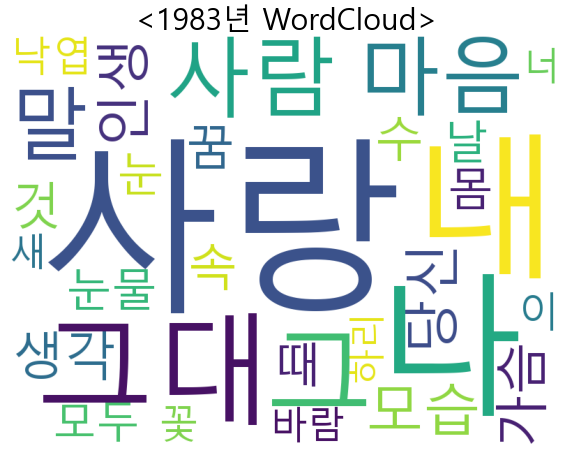

{'사랑': 79, '우리': 69, '나나': 57, '마음': 56, '그대': 55, '사람': 47, '속': 38, '나': 32, '눈물': 32, '너': 31, '아름다워': 30, '그': 28, '수': 27, '가슴': 26, '날': 24, '모습': 23, '내': 23, '눈': 23, '난': 22, '당신': 22, '꿈': 19, '이별': 19, '소리': 18, '없는': 18, '이': 17, '바람': 16, '밤': 16, '우린': 15, '그냥': 15, '슬픔': 15}


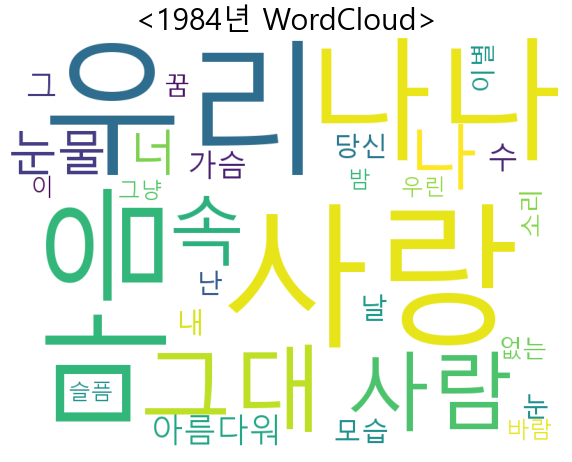

{'사랑': 132, '그대': 109, '나': 54, '마음': 49, '것': 47, '내': 44, '우리': 41, '가슴': 40, '그': 39, '수': 33, '눈물': 32, '바람': 31, '사람': 30, '속': 28, '말': 26, '곳': 25, '너': 24, '밤': 23, '이제': 23, '당신': 23, '섬': 21, '날': 20, '없는': 20, '노래': 20, '생각': 20, '작은': 19, '곁': 18, '무엇': 16, '알': 16, '추억': 16}


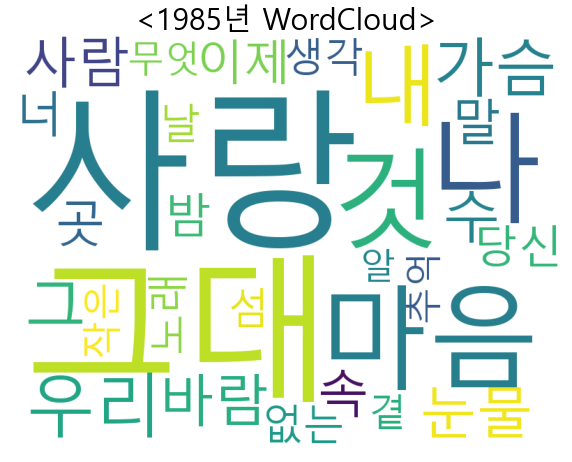

{'사랑': 105, '나': 93, '그대': 68, '간다': 61, '내': 59, '그': 56, '마음': 45, '너': 35, '우리': 34, '가슴': 32, '당신': 30, '날': 30, '수': 29, '이': 28, '이제': 25, '눈물': 24, '말': 21, '속': 21, '사람': 21, '모습': 20, '난': 19, '세상': 19, '하나': 17, '모두': 17, '꿈': 17, '다시': 16, '해': 16, '왜': 15, '추억': 15, '슬픔': 15}


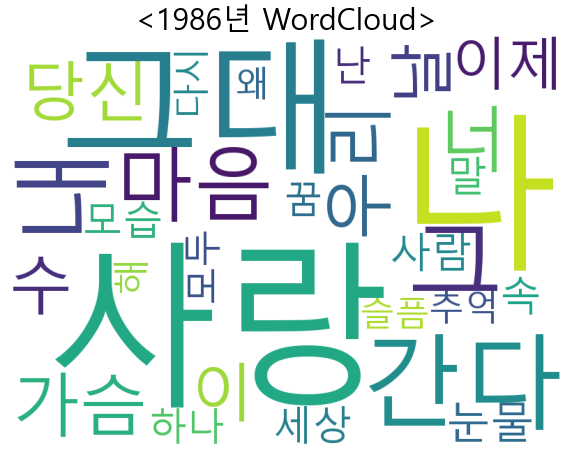

{'그대': 110, '사랑': 95, '나': 74, '마음': 49, '그': 42, '눈물': 41, '모습': 37, '너': 37, '내': 35, '가슴': 29, '사람': 28, '밤': 28, '말': 27, '당신': 26, '꿈': 26, '날': 25, '이슬': 25, '눈': 24, '슬픔': 23, '우리': 22, '하늘': 21, '추억': 21, '소리': 20, '것': 19, '슬픈': 19, '바람': 18, '생각': 18, '이제': 18, '디제이': 17, '수': 15}


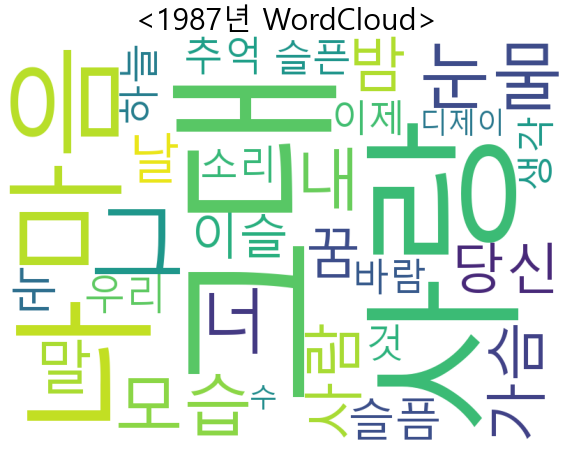

{'그대': 128, '사랑': 108, '내': 59, '나': 55, '밤': 55, '수': 50, '모습': 39, '속': 36, '그': 36, '마음': 30, '우리': 30, '너': 29, '것': 28, '멀리': 28, '거리': 24, '없는': 23, '이': 22, '날': 21, '곳': 21, '서울': 20, '당신': 19, '다시': 17, '가을': 17, '연인': 17, '눈물': 16, '같은': 16, '기억': 16, '가슴': 16, '아무': 15, '생각': 15}


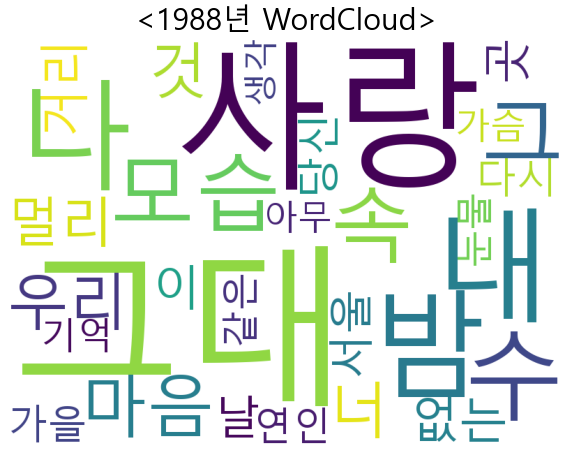

{'그대': 101, '사랑': 88, '나': 52, '내': 52, '말': 43, '마음': 42, '그': 39, '너': 34, '삿갓': 30, '루루': 30, '김삿갓': 29, '수': 28, '바람': 26, '난': 25, '것': 24, '밤': 24, '당신': 24, '없는': 23, '모습': 22, '우리': 21, '눈물': 20, '꿈': 20, '다시': 20, '낙비': 20, '어디': 19, '울': 19, '왜': 18, '알': 17, '속': 17, '모두': 16}


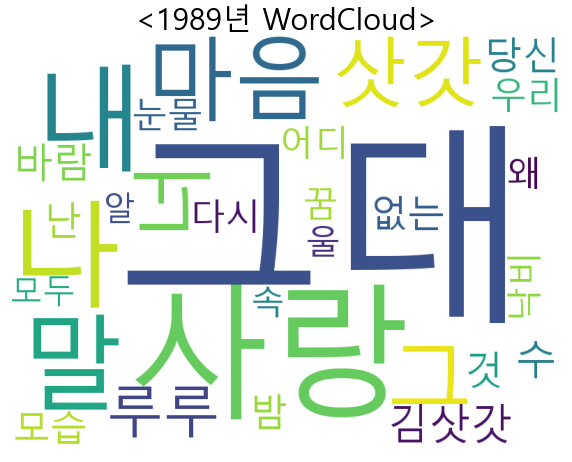

In [117]:
for year in range(1980,1990):
    draw_wordcloud(year)

In [114]:
def draw_pie(year):
    okt=Okt()
    sentences_tag=[]
    genre=list(musicDF[musicDF['연도']==year]['장르'].str.split(' / ')) # 연도별만 저장
    music_genres=[]
    for i in range(len(genre)):
        music_genres.append(genre[i][1])

    # 형태소 구분하여 리스트에 넣기
    for sentence in music_genres:
        morph=okt.pos(sentence)
        sentences_tag.append(morph)

    noun_adj_list=[]
    # 명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30) # 30개로 보여 주기로 정함

    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    genre_labels=dict(tags).keys()
    genre_values=dict(tags).values()
    #print(genre_labels)
    #print(genre_values)
    
    plt.figure(figsize=(10, 8))
    plt.title('<{}년 장르별>'.format(year),size=20)
    textprops={'size':14}
    plt.pie(genre_values,labels=genre_labels,autopct='%.1f%%',textprops=textprops,startangle=90)
    plt.legend(bbox_to_anchor=(0.5,0.5,0.7,0.5))
    plt.show()

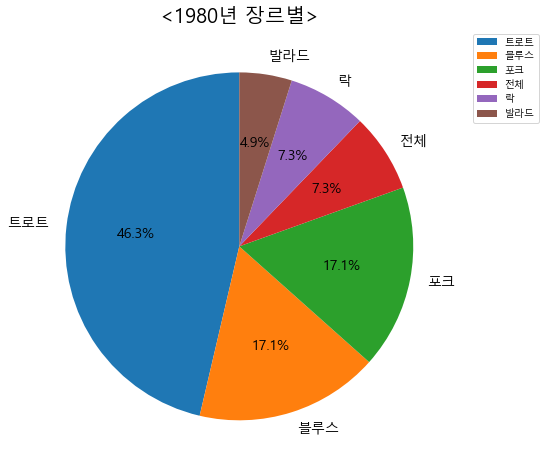

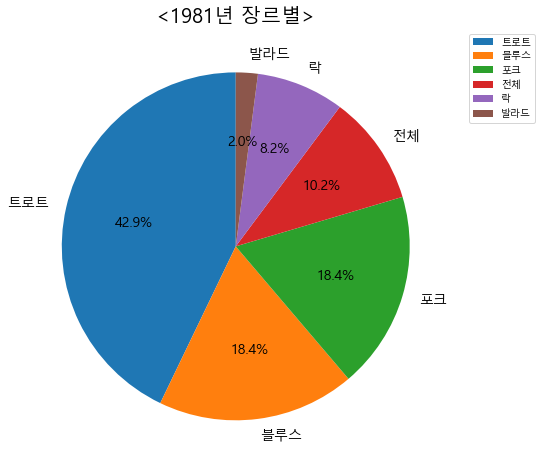

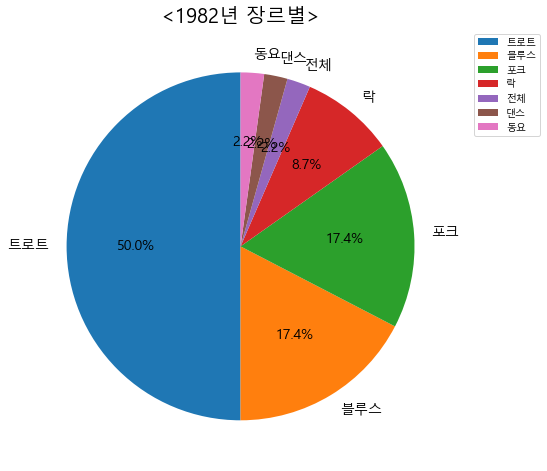

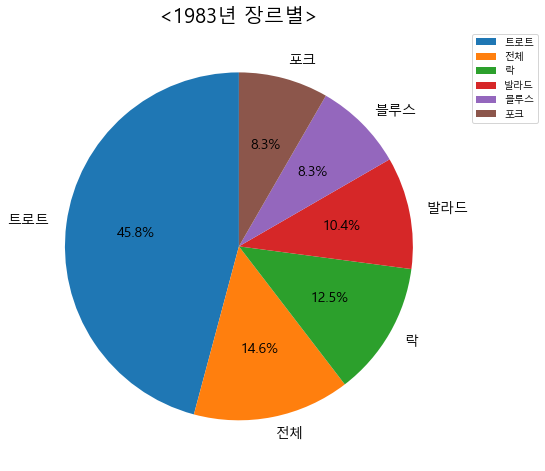

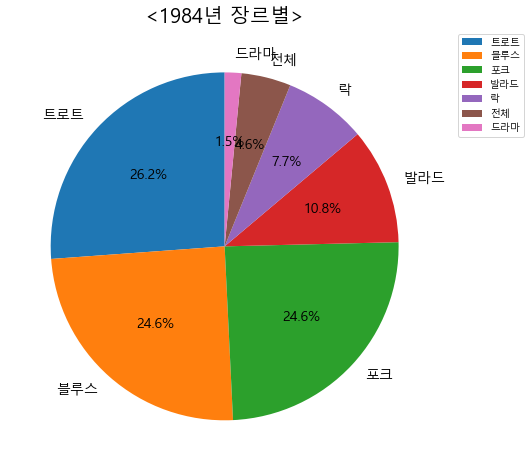

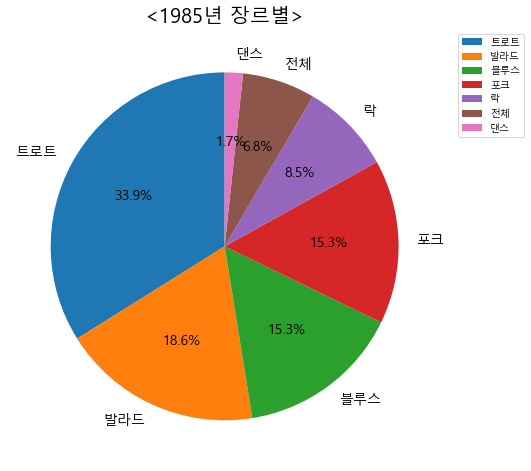

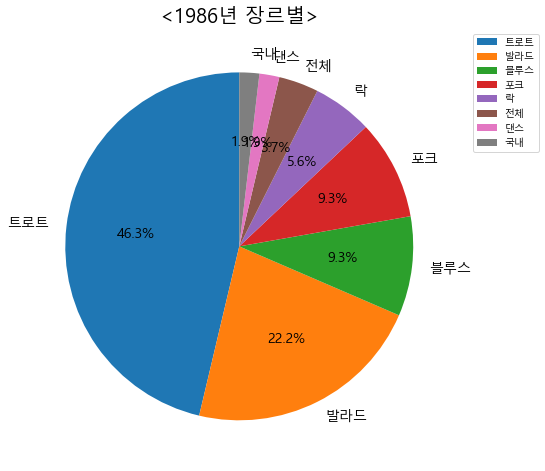

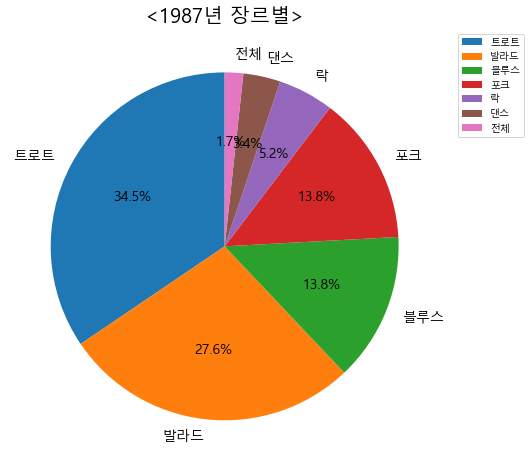

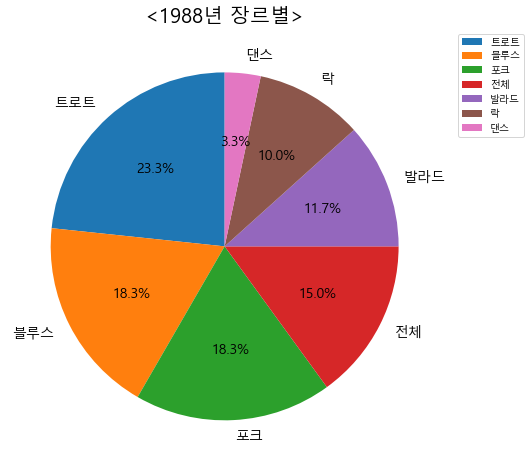

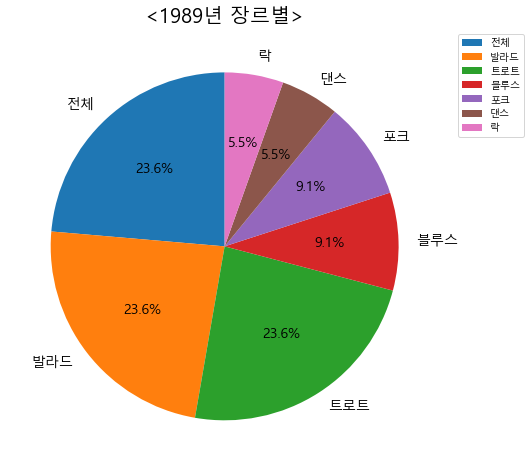

In [115]:
for year in range(1980,1990):
    draw_pie(year)